# Kinetic Model Coefficient Analysis

Marc Pérez  
May 22, 2025

In [ ]:

library(multcomp)


Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser

Loading required package: carData

Loading required package: Matrix


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack

Loading required package: ggpp

Registered S3 methods overwritten by 'ggpp':
  method                  from   
  heightDetails.titleGrob ggplot2
  widthDetails.titleGrob  ggplot2


Attaching package: 'ggpp'

The following object is masked from 'package:ggplot2':

    annotate


Attaching package: 'nlme'

The following object is masked from 'package:lme4':

    lmList


Attaching package: 'dplyr'

The following object is masked from 'package:kableExtra':

    group_rows

The following object is masked from 'package:nlme':

    collapse

The following object is masked from 'package:car':

    recode

The following object is masked from 'package:MASS':

    select

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'MuMIn':
  method        from 
  nobs.multinom broom
  nobs.fitdistr broom

Model Agroscope $$Y_{rel}\sim A*(1-e^{rate*P_{CO_2}+Env})$$

Wir ersetzen nur rate mit unserer Schätzung k: $$Y_{rel}\sim A*(1-e^{k*P_{CO_2}+Env})$$

Sind unsere Modelparameter gute Prediktoren?? $$Y_{rel}\sim A*(1-e^{k*PS+Env} )$$

Es gibt noch die Kovariaten Niederschlag pro Jahr, Jahresdurchschnittstemperatur und Temperatur in Jugendphase

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

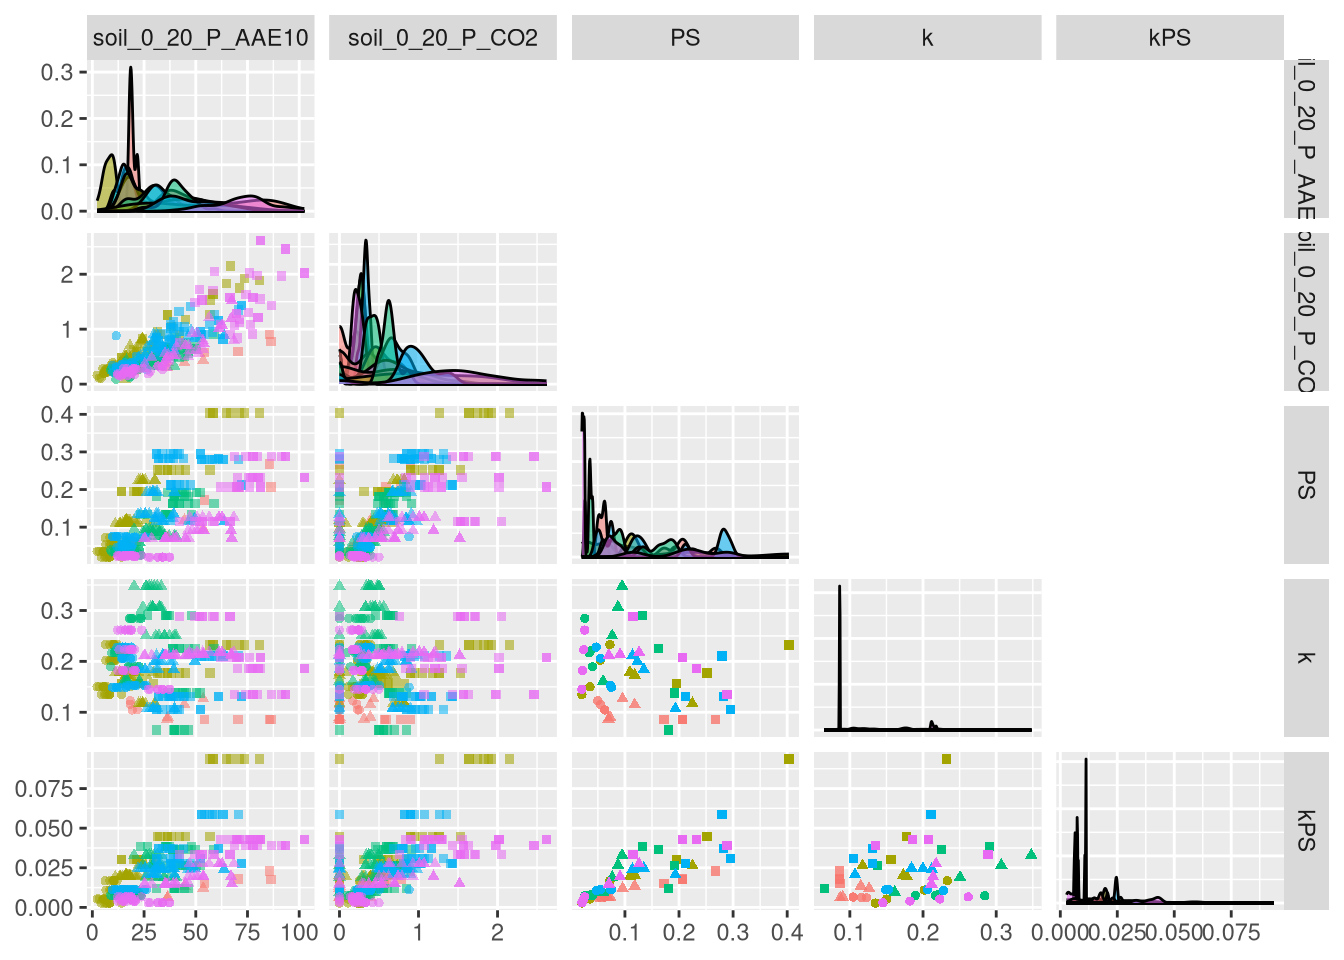

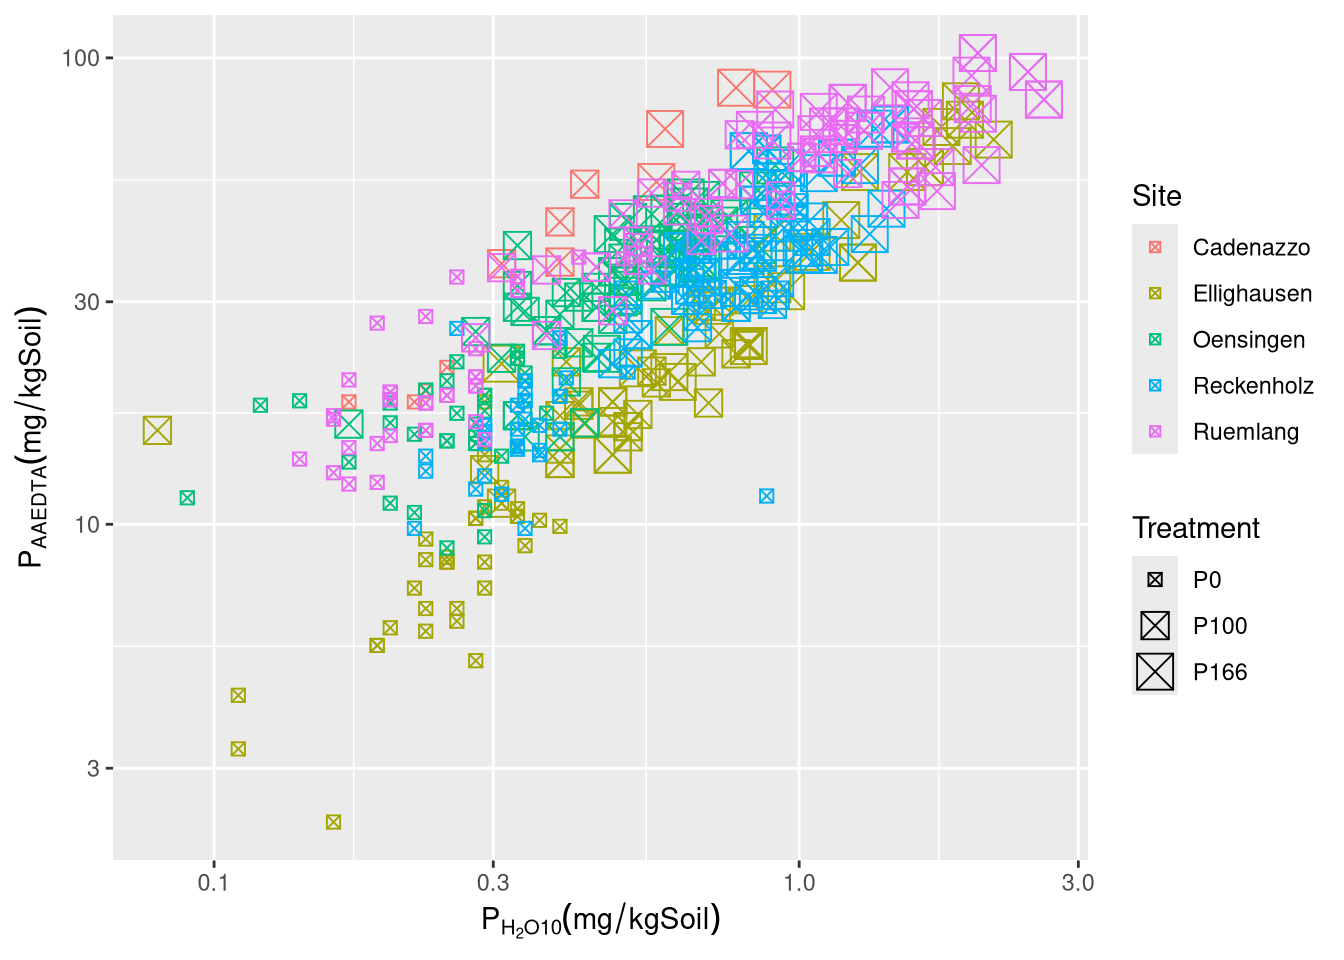

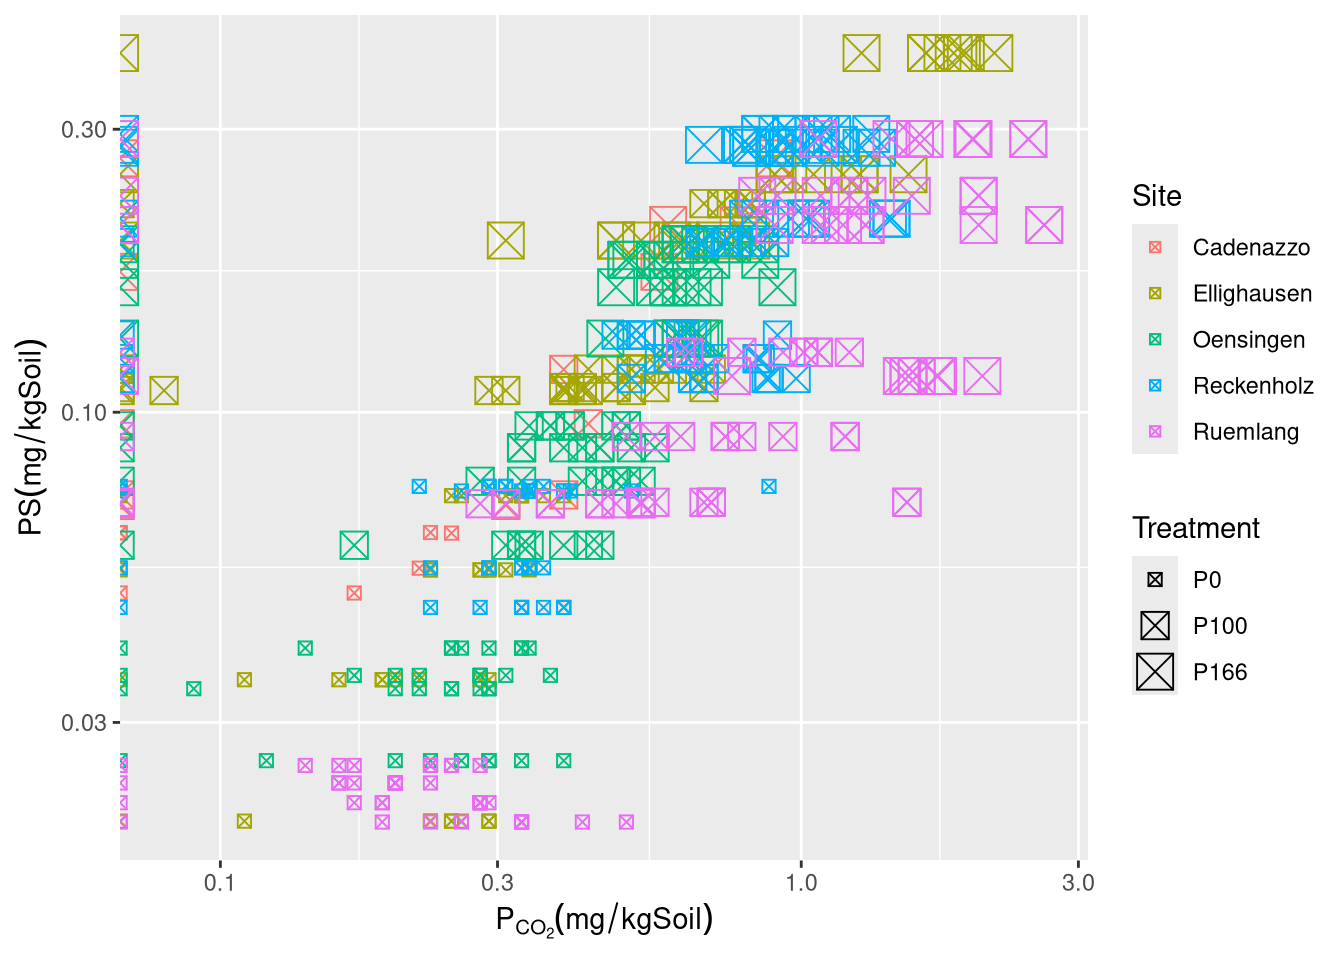

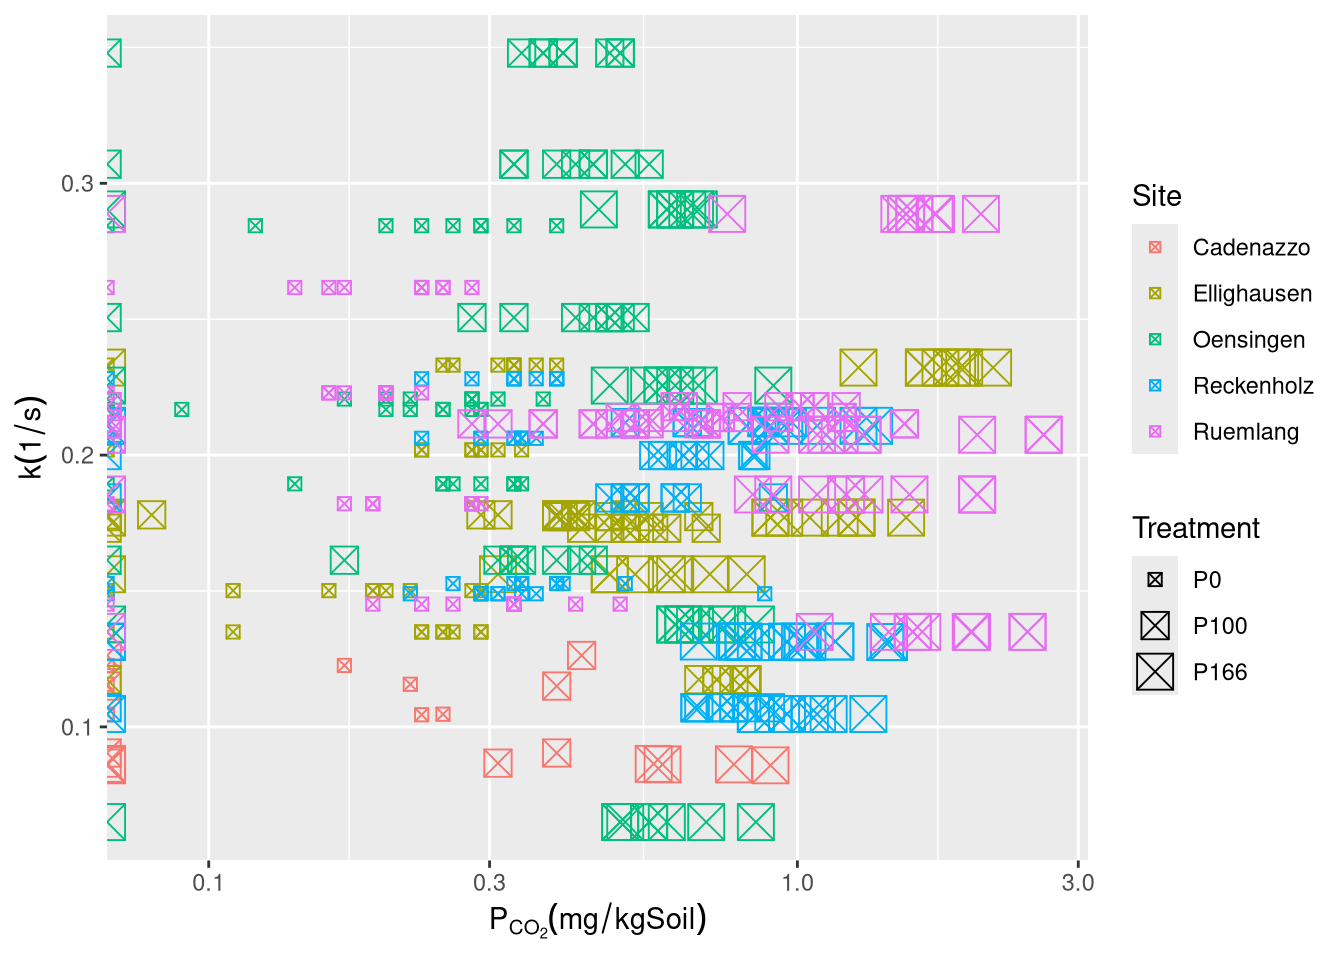

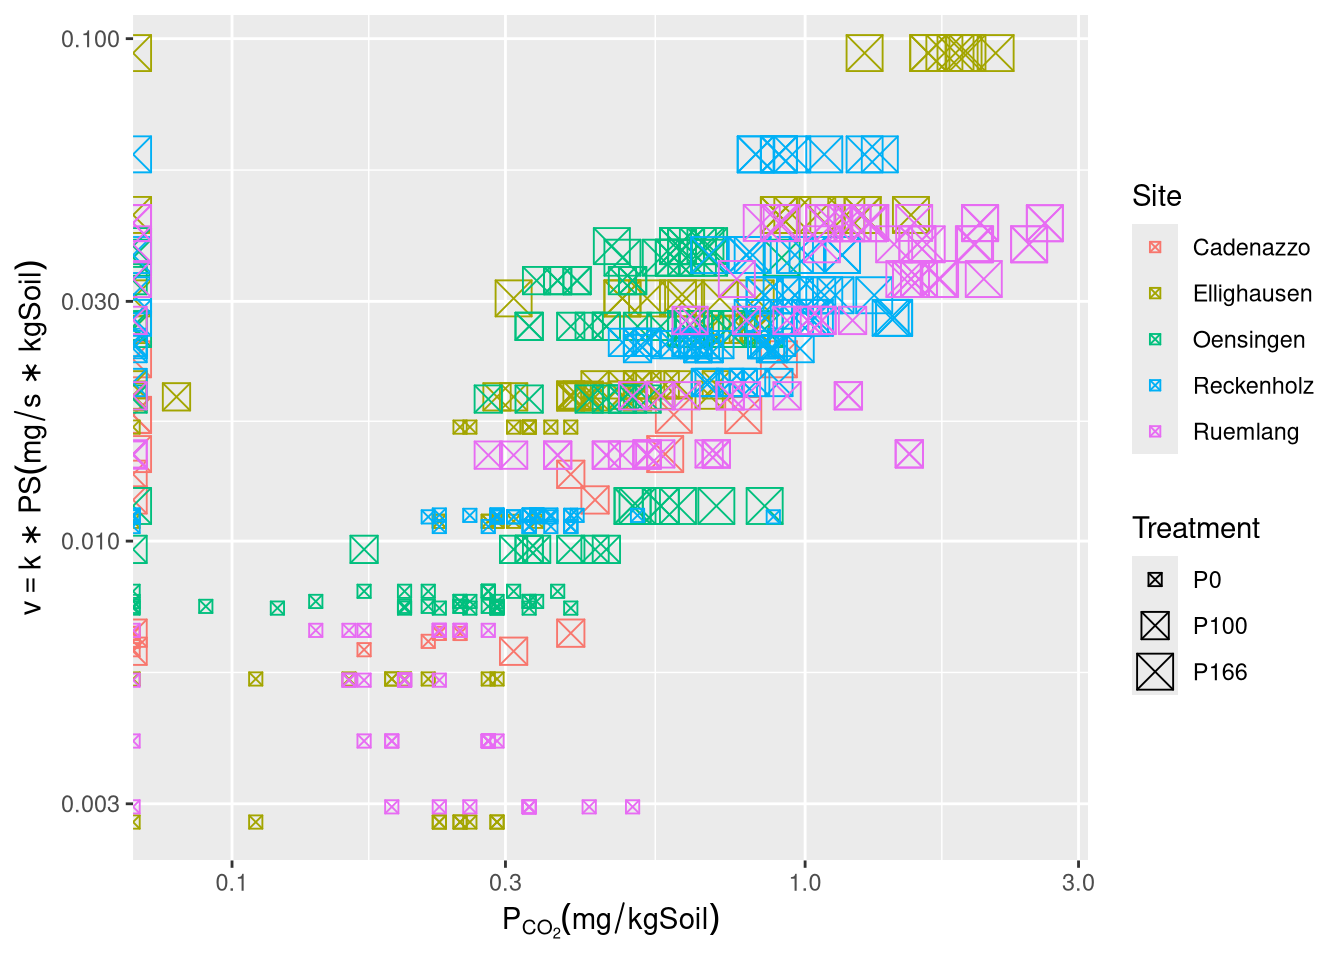

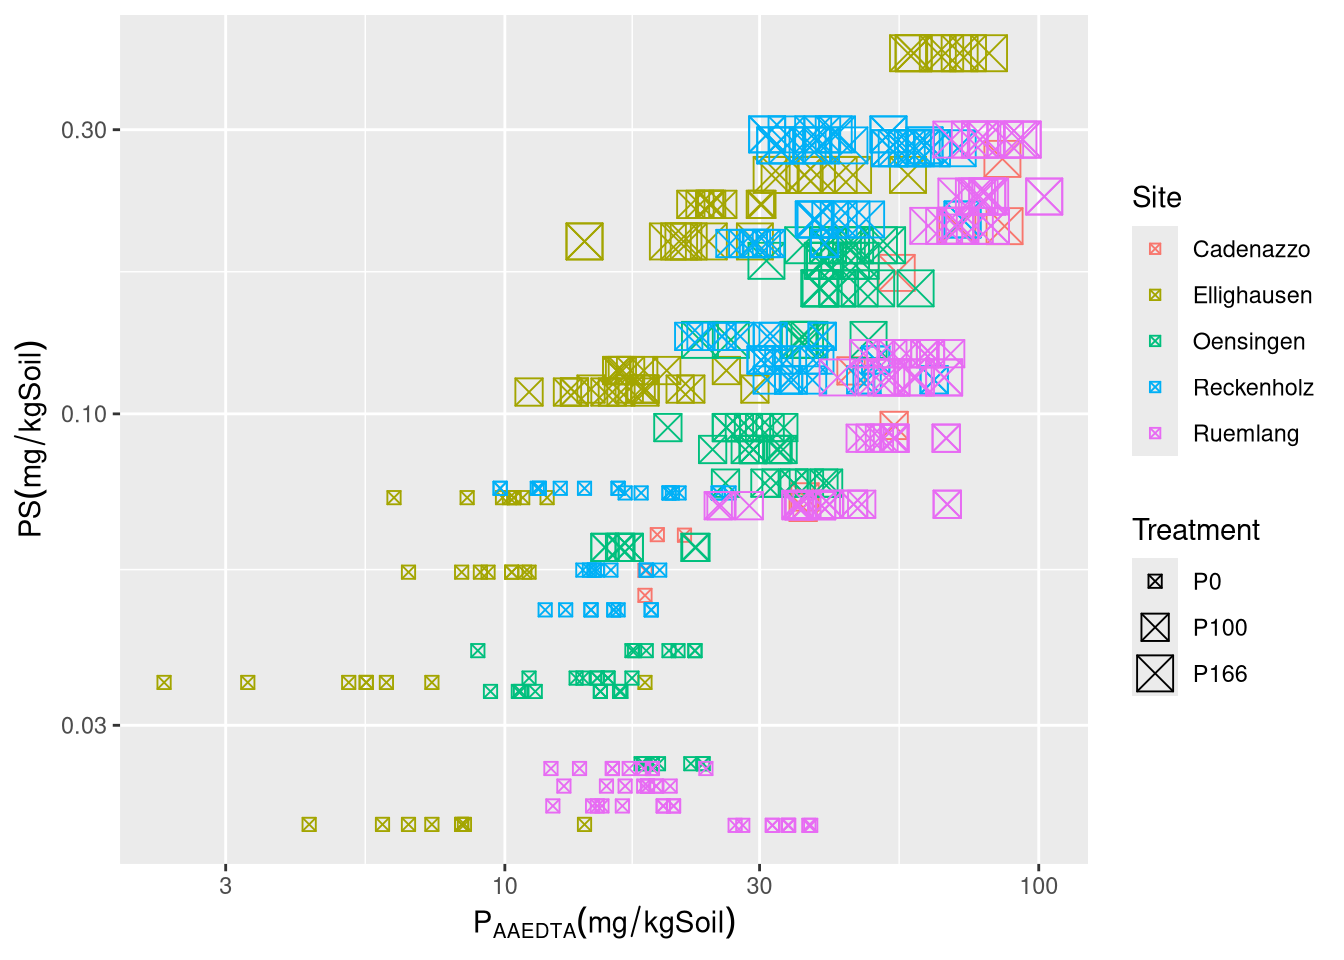

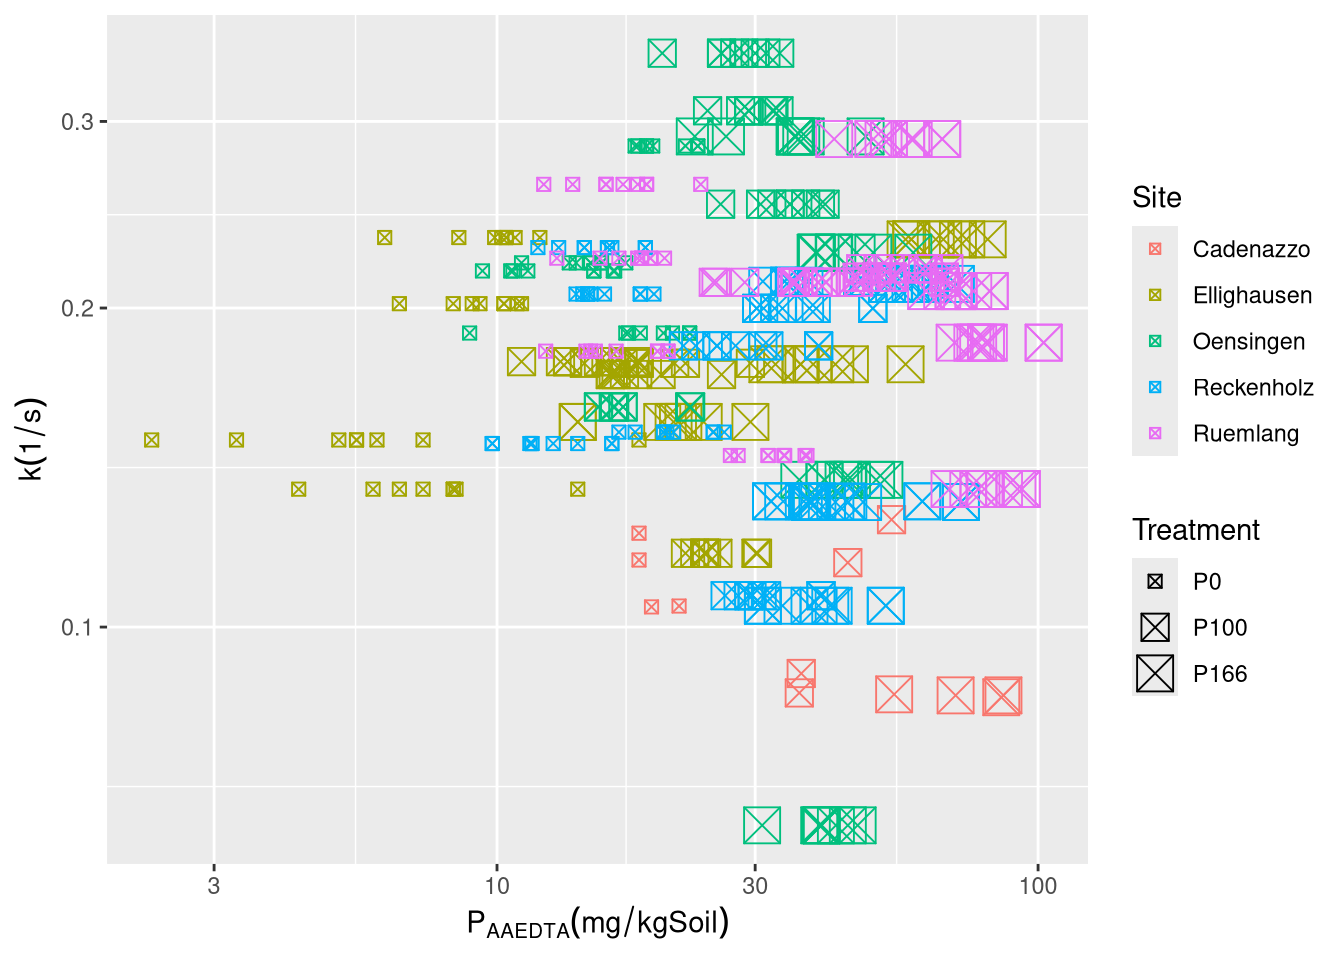

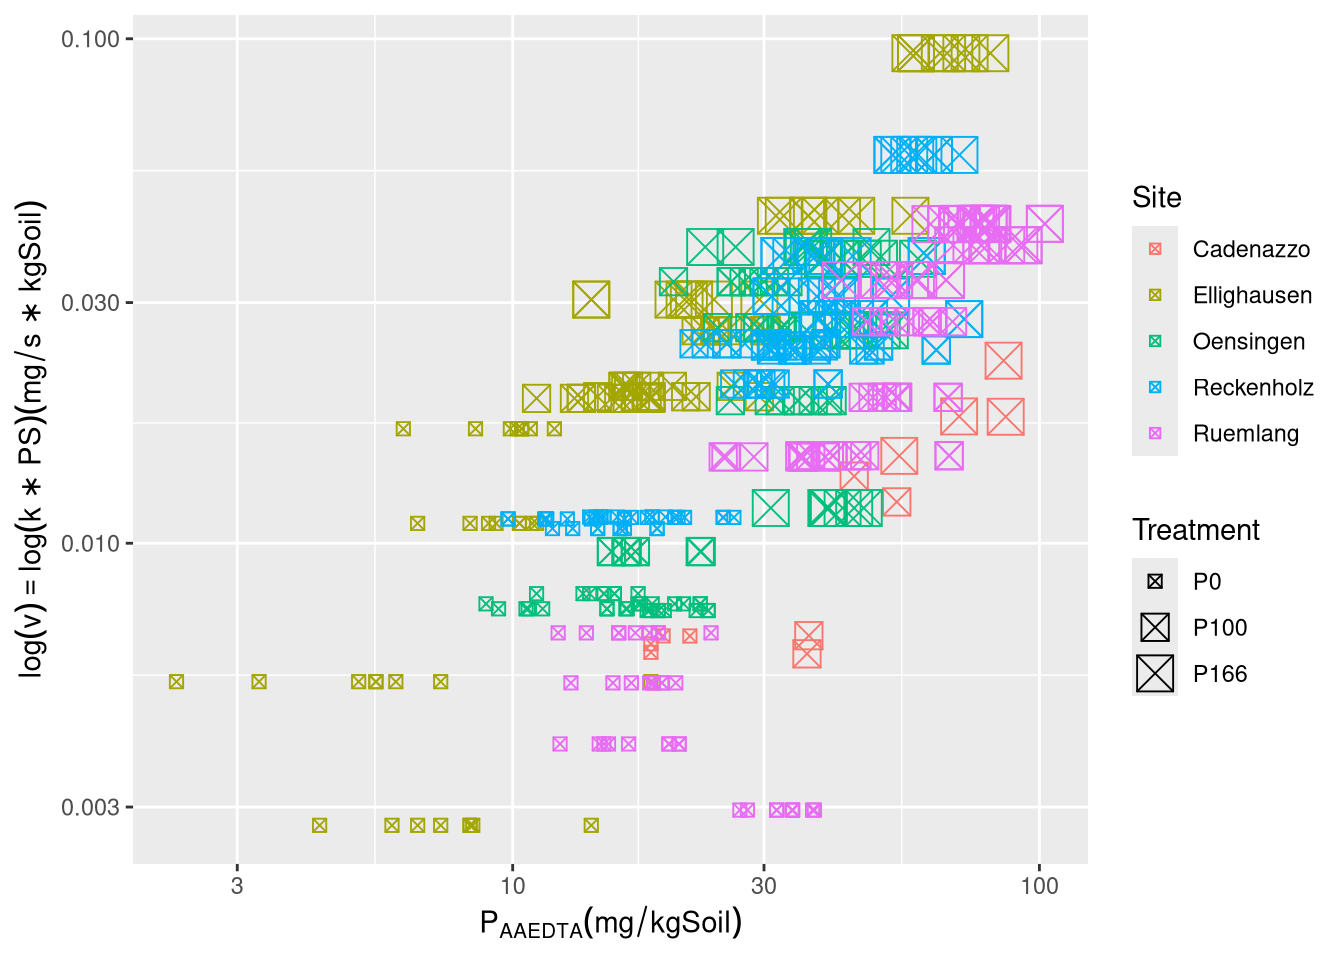

In [ ]:






library(GGally)


Nun noch die Linearen Regressionen, die ausstehend sind:

`(1|year) + (1|Site)  + (1|Site:block) + (Treatment|Site)`

Random intercept per year and site, block nested in site. and Treatment nested in site (could also be modelled as a random slope to allow for correlations)

In [ ]:


# Wovon hängen Modelparameter ab?

library(lmerTest)



Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF  DenDF  F value    Pr(>F)    
soil_0_20_clay    0.0719  0.0719     1 70.835   2.3900 0.1265690    
soil_0_20_pH_H2O  0.0152  0.0152     1 89.035   0.5061 0.4787086    
soil_0_20_Corg    0.4704  0.4704     1 65.081  15.6423 0.0001915 ***
soil_0_20_silt    0.1061  0.1061     1 70.745   3.5286 0.0644392 .  
Treatment        10.0459  5.0230     2  6.055 167.0386 5.047e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
                    Sum Sq   Mean Sq NumDF   DenDF F value   Pr(>F)   
soil_0_20_clay   0.0098143 0.0098143     1  69.314 10.0428 0.002277 **
soil_0_20_pH_H2O 0.0091422 0.0091422     1 102.384  9.3551 0.002838 **
soil_0_20_Corg   0.0014112 0.0014112     1  98.359  1.4440 0.232372   
soil_0_20_silt   0.0046704 0.0046704     1  75.910  4.7792 0.031888 * 
Treatment        0.0059043 0.0029521     2   5.405  3.0209 0.131613   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = k ~ soil_0_20_clay + soil_0_20_pH_H2O + soil_0_20_Corg + 
    soil_0_20_silt + Treatment + (1 | year) + (1 | Site) + (1 | 
    Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)  
(Intercept) == 0       0.074168   0.150771   0.492   0.9965  
soil_0_20_clay == 0   -0.007001   0.002209  -3.169   0.0102 *
soil_0_20_pH_H2O == 0  0.033720   0.011024   3.059   0.0145 *
soil_0_20_Corg == 0   -0.034533   0.028737  -1.202   0.7771  
soil_0_20_silt == 0    0.005864   0.002683   2.186   0.1650  
TreatmentP100 == 0     0.003910   0.015506   0.252   0.9999  
TreatmentP166 == 0    -0.031147   0.015685  -1.986   0.2537  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                 Sum Sq Mean Sq NumDF   DenDF F value   Pr(>F)    
soil_0_20_clay   0.0055 0.00551     1  77.626  0.1043 0.747639    
soil_0_20_pH_H2O 0.3773 0.37731     1 101.942  7.1335 0.008807 ** 
soil_0_20_Corg   0.0105 0.01052     1  93.639  0.1990 0.656575    
soil_0_20_silt   0.0036 0.00360     1  80.228  0.0681 0.794743    
Treatment        4.0339 2.01697     2   5.847 38.1329 0.000442 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = I(log(k * PS)) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + Treatment + (1 | year) + 
    (1 | Site) + (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept) == 0      -6.657570   1.107392  -6.012   <0.001 ***
soil_0_20_clay == 0   -0.005316   0.016463  -0.323    1.000    
soil_0_20_pH_H2O == 0  0.216354   0.081005   2.671    0.048 *  
soil_0_20_Corg == 0    0.094691   0.212278   0.446    0.998    
soil_0_20_silt == 0    0.005221   0.020000   0.261    1.000    
TreatmentP100 == 0     1.064948   0.189188   5.629   <0.001 ***
TreatmentP166 == 0     1.634290   0.190050   8.599   <0.001 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF   DenDF F value Pr(>F)
k         146.11  146.11     1 151.805  0.4824 0.4884
log(PS)    44.91   44.91     1 226.958  0.1483 0.7005
Treatment 740.92  370.46     2   4.838  1.2232 0.3716
k:log(PS) 324.35  324.35     1 172.913  1.0710 0.3022

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
k          41.986  41.986     1 456.19  0.3035 0.5819
log(PS)     6.315   6.315     1 457.82  0.0457 0.8309
Treatment 129.470  64.735     2 443.37  0.4680 0.6266
k:log(PS)  39.416  39.416     1 457.86  0.2850 0.5937

Type III Analysis of Variance Table with Satterthwaite's method
                 Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.0118 0.01181     1 48.798  0.1428 0.7071250    
soil_0_20_pH_H2O 0.0686 0.06858     1 65.341  0.8297 0.3657041    
soil_0_20_Corg   0.2993 0.29934     1 37.017  3.6216 0.0648334 .  
soil_0_20_silt   0.0665 0.06645     1 22.514  0.8040 0.3793909    
Treatment        4.8977 2.44886     2  5.827 29.6281 0.0008839 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
                 Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
soil_0_20_clay   0.0491  0.0491     1 58.650  1.1361 0.2908517    
soil_0_20_pH_H2O 0.2473  0.2473     1 75.287  5.7214 0.0192552 *  
soil_0_20_Corg   0.2830  0.2830     1 45.764  6.5490 0.0138669 *  
soil_0_20_silt   0.0572  0.0572     1 87.560  1.3231 0.2531704    
Treatment        7.5352  3.7676     2  4.841 87.1720 0.0001598 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
           Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
k            20.3    20.3     1 457.51  0.0960    0.7568    
log(PS)      12.9    12.9     1 455.60  0.0613    0.8046    
Treatment 15488.3  7744.1     2 379.27 36.7144 2.658e-15 ***
k:log(PS)    10.1    10.1     1 455.83  0.0477    0.8272    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_balance ~ k * log(PS) + Treatment + (1 | year) + (1 |  
    Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 3854.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8654 -0.5354 -0.0249  0.5914  3.3879 

Random effects:
 Groups         Name        Variance Std.Dev.
 Site:block     (Intercept)   0.00    0.000  
 Site:Treatment (Intercept)   0.00    0.000  
 year           (Intercept)  51.80    7.197  
 Site           (Intercept)  21.44    4.631  
 Residual                   210.93   14.523  
Number of obs: 471, groups:  
Site:block, 20; Site:Treatment, 15; year, 8; Site, 5

Fixed effects:
              Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)    -16.980     10.354 231.810  -1.640    0.102    
k              -12.679     40.918 457.507  -0.310    0.757    
log(PS)         -0.916      3.701 455.596  -0.248    0.

           R2m       R2c
[1,] 0.4228263 0.5715903

            R2m       R2c
[1,] 0.01723874 0.6121275

            R2m       R2c
[1,] 0.03304352 0.8042098

Since we now model two measurement methods, we do not expect correlations by Site/year/etc

In [ ]:
# fit.PS       <- lm(PS            ~ soil_0_20_P_CO2 + soil_0_20_P_AAE10, D)
fit.grud.PS       <- lm(log(PS)         ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.grud.k        <- lm(k               ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.grud.kPS      <- lm(I(log(k*PS))    ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)

fit.grud.Yrel     <- lmer(Ymain_rel       ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) + Treatment + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)

# this is hopeless, since cannot log becaus of 0's
fit.grud.Puptake     <- lmer(annual_P_uptake     ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) + Treatment + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)


boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = log(PS) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -1.59063    0.23863  -6.666   <1e-04 ***
log(soil_0_20_P_CO2) == 0    1.02613    0.06084  16.866   <1e-04 ***
log(soil_0_20_P_AAE10) == 0 -0.02995    0.06127  -0.489    0.793    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = k ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0             0.103889   0.028977   3.585  < 0.001 ***
log(soil_0_20_P_CO2) == 0   -0.026427   0.007388  -3.577  < 0.001 ***
log(soil_0_20_P_AAE10) == 0  0.021027   0.007440   2.826  0.00817 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = I(log(k * PS)) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -3.63331    0.24159 -15.039   <0.001 ***
log(soil_0_20_P_CO2) == 0    0.90485    0.06160  14.690   <0.001 ***
log(soil_0_20_P_AAE10) == 0  0.04814    0.06203   0.776    0.586    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
Ymain_rel ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) + Treatment +  
    (1 | year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 1726.8

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.98805 -0.62531 -0.03449  0.57660  3.15994 

Random effects:
 Groups         Name        Variance Std.Dev.
 Site:block     (Intercept)   1.815   1.347  
 Site:Treatment (Intercept)  26.585   5.156  
 year           (Intercept) 175.180  13.236  
 Site           (Intercept)  22.431   4.736  
 Residual                   194.780  13.956  
Number of obs: 212, groups:  
Site:block, 16; Site:Treatment, 12; year, 5; Site, 4

Fixed effects:
                       Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)              70.659     16.451  69.722   4.295 5.54e-05 ***
log(soil_0_20_P_CO2)      1.155      3.967 152.164   0.291   0

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_uptake ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) +  
    Treatment + (1 | year) + (1 | Site) + (1 | Site:block) +  
    (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 3112.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5656 -0.4852  0.0615  0.5877  4.0429 

Random effects:
 Groups         Name        Variance Std.Dev.
 Site:block     (Intercept)   0.000   0.000  
 Site:Treatment (Intercept)   0.000   0.000  
 year           (Intercept) 144.870  12.036  
 Site           (Intercept)   8.992   2.999  
 Residual                   107.132  10.350  
Number of obs: 412, groups:  
Site:block, 20; Site:Treatment, 15; year, 7; Site, 5

Fixed effects:
                       Estimate Std. Error       df t value Pr(>|t|)
(Intercept)             14.2487     8.9343  57.6545   1.595    0.116
log(soil_0_20_P_CO2)     2.0836     1.9505 283.2590   1.068    0.28

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_balance ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10) +  
    Treatment + (1 | year) + (1 | Site) + (1 | Site:block) +  
    (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 3269.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3875 -0.5837 -0.1052  0.6817  2.9298 

Random effects:
 Groups         Name        Variance Std.Dev.
 Site:block     (Intercept)   0.00    0.000  
 Site:Treatment (Intercept)   0.00    0.000  
 year           (Intercept)  61.91    7.868  
 Site           (Intercept)  10.76    3.280  
 Residual                   160.52   12.670  
Number of obs: 412, groups:  
Site:block, 20; Site:Treatment, 15; year, 7; Site, 5

Fixed effects:
                       Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)             -16.640      9.699  84.718  -1.716   0.0899 .  
log(soil_0_20_P_CO2)     -5.004      2.365 257.039  -2.116  

           R2m       R2c
[1,] 0.4145326 0.5969757

            R2m       R2c
[1,] 0.02058153 0.5979709

            R2m       R2c
[1,] 0.09773311 0.5823498